# Learning Curves

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn import datasets
from sklearn import cluster

from sklearn import naive_bayes
from sklearn import svm
from sklearn import tree
# import the whole model selection module
from sklearn import model_selection
sns.set_theme(palette='colorblind')

## Digits Dataset
Today, we'll load a new dataset and use the default sklearn data structure for datasets.  We get back the default data stucture when we use a `load_` function without any parameters at all.

In [2]:
digits = datasets.load_digits()

This shows us that the type is defined by sklearn and they called it `bunch`:

In [3]:
type(digits)

sklearn.utils._bunch.Bunch

We can print it out to begin exploring it.

In [4]:
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

We note that it has key value pairs, and that the last one is called `DESCR` and is text that describes the data.  If we send that to the print function it will be formatted more readably.

In [5]:
print(digits['DESCR'])

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

This tells us that we are going to be predicting what digit (0,1,2,3,4,5,6,7,8, or 9) is in the image.

To get an idea of what the images look like, we can use `matshow` which is short for matrix show. It takes a 2D matrix and plots it as a grayscale image. To get the actual color bar, we use the matplotlib `plt.gray()`.  
````{margin}
```{admonition} Try it yourself
Try using matshow without `plt.gray()`. How is it different?  What might alternatives do?  What other code in this notebook influences how plots look?
```
```{tip}
Removing a line from an excerpt of code can help you see hat that line did and learn more about how each piece work.
```
````

<Figure size 640x480 with 0 Axes>

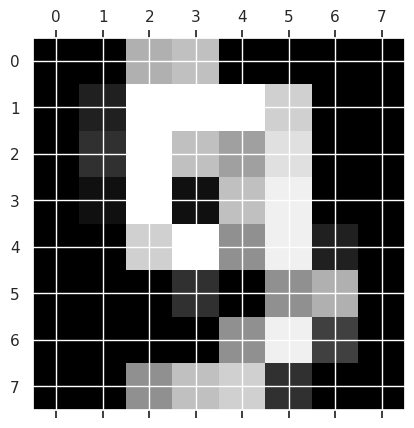

In [6]:
plt.gray()
plt.matshow(digits.images[9])

## Setting up the Problem

In [7]:
digits_X = digits.data
digits_y = digits.target

`bunch` objects are designed for machine learning, so they have the features as "data" and target explicitly identified.

In [8]:
digits_X.shape, digits_y.shape

((1797, 64), (1797,))

This has one row for each sample and has reshaped the 8x8 image into a 64 length vector. So we have one 'feature' for each pixel in the images.



The size of the `.images` is the total number of pixel values.

In [9]:
1797*8*8

115008

## Learning Curves

We are going to do some model comparison, so we will instantiate estimator objects for two different classifiers.

In [10]:
svm_clf = svm.SVC(gamma=0.001)
gnb_clf = naive_bayes.GaussianNB()

We're going to use a [ShuffleSplit](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.ShuffleSplit.html) object to do Cross validation with 100 iterations to get smoother mean test and train
score curves, each time with 20% data randomly selected as a validation set.

```{admonition} Further Reading

You can see visualization of different [cross validation](https://scikit-learn.org/stable/auto_examples/model_selection/plot_cv_indices.html#visualize-cross-validation-indices-for-many-cv-objects) types in the sklearn documentation.
```

In [11]:
cv = model_selection.ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

```{note}
This object has a `random_state` object, the `GridSearchCV` that we were using didn't have a way to control the random state directly, but it accepts not only integers, but also cross validation objects to the `cv` parameter. The KFold cross validation object also has that parameter, so we could repeat what we did in previous classes by creating a `KFold` object with a fixed random state.
```

We'll also create a linearly spaced list of training percentages.

```{important}
You could speed it up by splitting it into jobs with the `n_jobs` parameter
```

````{margin}
```{admonition} Try it yourself
Try varying the `n_jobs` parameter and tmiing the execution using the
[timit magic](https://ipython.readthedocs.io/en/stable/interactive/magics.html#magic-timeit)
```
````
Now we can create the learning curve.

In [12]:
train_sizes = np.linspace(.05,1,10)

train_sizes_svm, train_scores_svm, test_scores_svm, fit_times_svm, score_times_svm = model_selection.learning_curve(
    svm_clf,
    digits_X,
    digits_y,
    cv=cv,
    train_sizes=train_sizes,
    return_times=True,)

KeyboardInterrupt: 

It returns the list of the counts for each training size (we input percentages and it returns counts)

In [ ]:
train_sizes_svm

The other parameters, it returns a list for each length that's 100 long because our cross validation was 100 iterations.

In [ ]:
fit_times_svm.shape

We can save it in a DataFrame after averaging over the 100 trials.

In [ ]:
svm_learning_df = pd.DataFrame(data = train_sizes_svm, columns = ['train_size'])
# svm_learning_df['train_size'] = train_sizes_svm
svm_learning_df['train_score'] = np.mean(train_scores_svm,axis=1)
svm_learning_df['test_score'] = np.mean(test_scores_svm,axis=1)
svm_learning_df['fit_time'] = np.mean(fit_times_svm,axis=1)
svm_learning_df['score_times'] = np.mean(score_times_svm,axis=1)

In [ ]:
svm_learning_df.head()

We can use our skills in transforming data to make it easier to exmine just a subset of the scores.
````{margin}
```{hint}
This is *one* thing we can analyze, but there are others. To earn prepare on assignment 11,  manipulate your results a different way.
```
````

In [ ]:
svm_learning_df_scores = svm_learning_df.melt(id_vars=['train_size'],
                                                value_vars=['train_score','test_score'])
svm_learning_df_scores.head(2)

This new DataFrame allows us to make convenient plots.

In [ ]:
sns.lineplot(data=svm_learning_df_scores,x='train_size',y='value',hue='variable')

### Gaussian Naive Bayes

We can do the same thing with GNB

In [ ]:
train_sizes_gnb, train_scores_gnb, test_scores_gnb, fit_times_gnb, score_times_gnb = model_selection.learning_curve(
  gnb_clf,
  digits_X,
  digits_y,
  cv=cv,
  train_sizes=train_sizes,
  return_times=True,)

````{margin}
```{tip}
Getting used to thinking though these sorts of manipulations can take time, but
is valuable. Investing time to learn these things will help you both write
shorter, more readable, easy to examine, code (which is nicer to your co-workers)
and help you develop flexible mental representation.  The flexiblity of your
mental model of material is the way learning scientists distinguish compentent
practioners from experts.  

```
````

In [ ]:
gnb_learning_df = pd.DataFrame(data = train_sizes_gnb, columns = ['train_size'])
# gnb_learning_df['train_size'] = train_sizes_gnb
gnb_learning_df['train_score'] = np.mean(train_scores_gnb,axis=1)
gnb_learning_df['test_score'] = np.mean(test_scores_gnb,axis=1)
gnb_learning_df['fit_time'] = np.mean(fit_times_gnb,axis=1)
gnb_learning_df['score_times_gnb'] = np.mean(score_times_gnb,axis=1)

In [ ]:
gnb_learning_scores = gnb_learning_df.melt(id_vars=['train_size'],value_vars=['train_score','test_score'])
sns.lineplot(data = gnb_learning_scores, x ='train_size', y='value',hue='variable')

Notice in this case that the training accuracy starts high with the test accuracy low.  This big gap means that the model was overfitting to something that was different about the training set from the test set.  It was 

## Questions After Class

### how do I run the code to pull issues?

This uses the [GitHub CLI](https://cli.github.com/)

```
gh issue list --state all -L 45 --json title,url,state > grade-tracker.json
```

### Is fit time as important as accuracy? I would think generally for real life application we would want results over time.

Fit time is generally not as important as accuracy when deploying a model. This question gets at a really important point.  Some of the metrics that we have for machine learning algorithms are for evaluating the *learning* algorithm, if someone develops a new learning algorithm that can perform as well as old ones, but faster that's really helpful.  You are correct,  

That said, the score time can be really important in a deployed model.

### Why in the SVC model did we used gamma=0.001 and not other values? Why does that parameter represent in the model?

The gamma $\gamma$ parameter for the default rbf kernel controls basically how wavy the line is.  I set it to a value that is known to work well for this dataset because, for time reasons, I did not want to also do a grid search.

### I'm sure it will be in the notes but a better understanding of how learning curve works

### Can you go over the melt function again?

• running code will be posted tonight correct?

• nothing at the moment